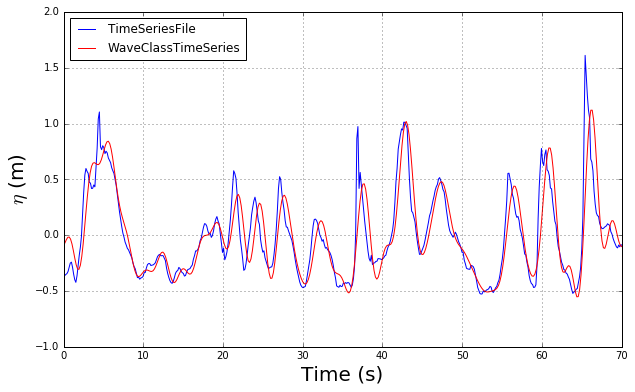

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

with open("Duck_series.txt","r") as f:
    timeSeries=np.loadtxt(f)
    
time = timeSeries[:,0]

eta = timeSeries[:,1]

eta -= np.mean(eta)
timeSeriesFile="Duck_series.txt"
skiprows=0
depth=7.
N=32
mwl=0.
waveDir=np.array([1., 0., 0.])
g=np.array([0., 0., -9.81])
rec_direct=True
window_params=None
timeSeriesPosition=[0., 0., 0.]


TS = TimeSeries(timeSeriesFile,
                skiprows,
                timeSeriesPosition,
                depth,
                N,
                mwl,
                waveDir,
                g,
                rec_direct,
                window_params
                )

n=400

eta_t=np.zeros(n)

tnlist=np.linspace(0, 70, n)
    
for i in range(len(tnlist)):
    x = [2., 0.5, 0.]
    t = tnlist[i]
    eta_t[i] = TS.etaDirect(x, t)
    
plt.figure(figsize=(10,6), dpi=100)

plt.plot(time, eta, color='blue', label="TimeSeriesFile")
plt.plot(tnlist, eta_t, color='red', label="WaveClassTimeSeries")

plt.xlim(0, 70)
plt.xlabel("Time (s)", size=20)
plt.ylabel("$\eta$ (m)", size=20)
plt.legend(loc='upper left')
plt.grid()
plt.show()




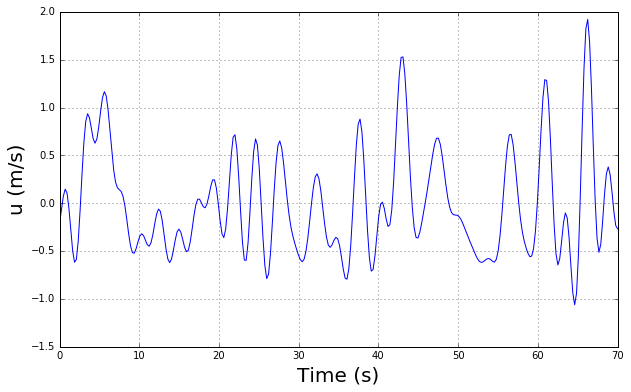

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
from WaveTools import TimeSeries
import numpy as np

n=300
uVel_t=np.zeros(n)

timeSeriesFile="Duck_series.txt"
skiprows=0
depth=7.
N=32
mwl=0.
waveDir=np.array([1., 0., 0.])
g=np.array([0., 0., -9.81])
rec_direct=True
window_params=None
timeSeriesPosition=[0., 0., 0.]


TS = TimeSeries(timeSeriesFile,
                skiprows,
                timeSeriesPosition,
                depth,
                N,
                mwl,
                waveDir,
                g,
                rec_direct,
                window_params
                )


tnlist=np.linspace(0, 70, n)
    
for i in range(len(tnlist)):
    x = [2., 0.5, 0.]
    t = tnlist[i]
    uVel_t[i] = TS.uDirect(x, t)[0]

    
plt.figure(figsize=(10,6), dpi=100)

plt.plot(tnlist, uVel_t)

plt.xlim(0, 70)
plt.xlabel("Time (s)", size=20)
plt.ylabel("u (m/s)", size=20)
plt.grid()
plt.show()

